<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/ConWo-Tech/blob/master/Contour_mapping_on_water_bottle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
image1=cv2.imread('/content/IMG_20190928_114518.jpg')
image2=cv2.imread('/content/IMG_20190928_114646.jpg')
#image3=cv2.imread('/content/IMG_20190928_114536.jpg')


## Image Preprocessing

In [0]:
images=[image1, image2]

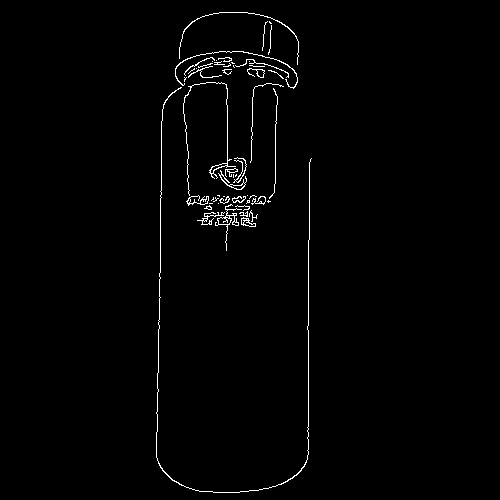

In [171]:
i=cv2.resize(image1, (500, 500))
gray=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
dst = cv2.fastNlMeansDenoisingColored(i,None, 15, 15, 7, 21)
gaussian=cv2.GaussianBlur(dst, (5,5), 0)
ret,thresh1 = cv2.threshold(gaussian, 55, 255, cv2.THRESH_TOZERO)
edged=cv2.Canny(thresh1, 170, 50)

cv2_imshow(edged)

Number of contours 3
37 16 23 85
38 15 11 27
32 2 33 102


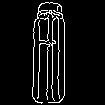

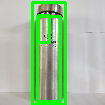

Number of contours 7
55 41 5 1
55 18 5 22
45 17 10 55
42 14 22 84
51 5 2 5
43 5 19 8
35 2 34 101


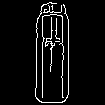

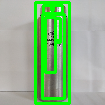

In [179]:
for i in images:
  
  i=cv2.resize(i, (105, 105))
  
  gray=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  dst = cv2.fastNlMeansDenoisingColored(i,None, 15, 15, 7, 21)
  gaussian=cv2.GaussianBlur(dst, (5,5), 0)
  ret,thresh1 = cv2.threshold(gaussian, 55, 255, cv2.THRESH_TOZERO)
  edged=cv2.Canny(thresh1, 300, 50)
  
  _, contours, hierarchy=cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  print('Number of contours' , str(len(contours)))
  for contour in contours:
   
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(i, (x,y), (x+w,y+h), (0,255,0), 2)
    #cv2.line(i,(0,y+h), (500,y+h), (255,0,0), 1)
    print(x,y,w,h)

  
  cv2_imshow(edged)
  cv2_imshow(i)
#cv2_imshow(edged)

In [0]:
image1=cv2.imshow